In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

#female = 0, male = 1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'Age':
[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]


Unique values in 'Gender':
['Female' 'Male']


Unique values in 'Total_Bilirubin':
[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]


Unique values in 'Direct_Bilirubin':
[ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1. 

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.000000,58.0,90.0
Gender,583.0,0.756432,0.429603,0.0,1.0,1.000000,1.0,1.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.000000,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.300000,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.000000,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.000000,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.000000,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.600000,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.100000,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.947064,0.318492,0.3,0.7,0.947064,1.1,2.8


In [13]:
df.shape

(583, 11)

<Axes: >

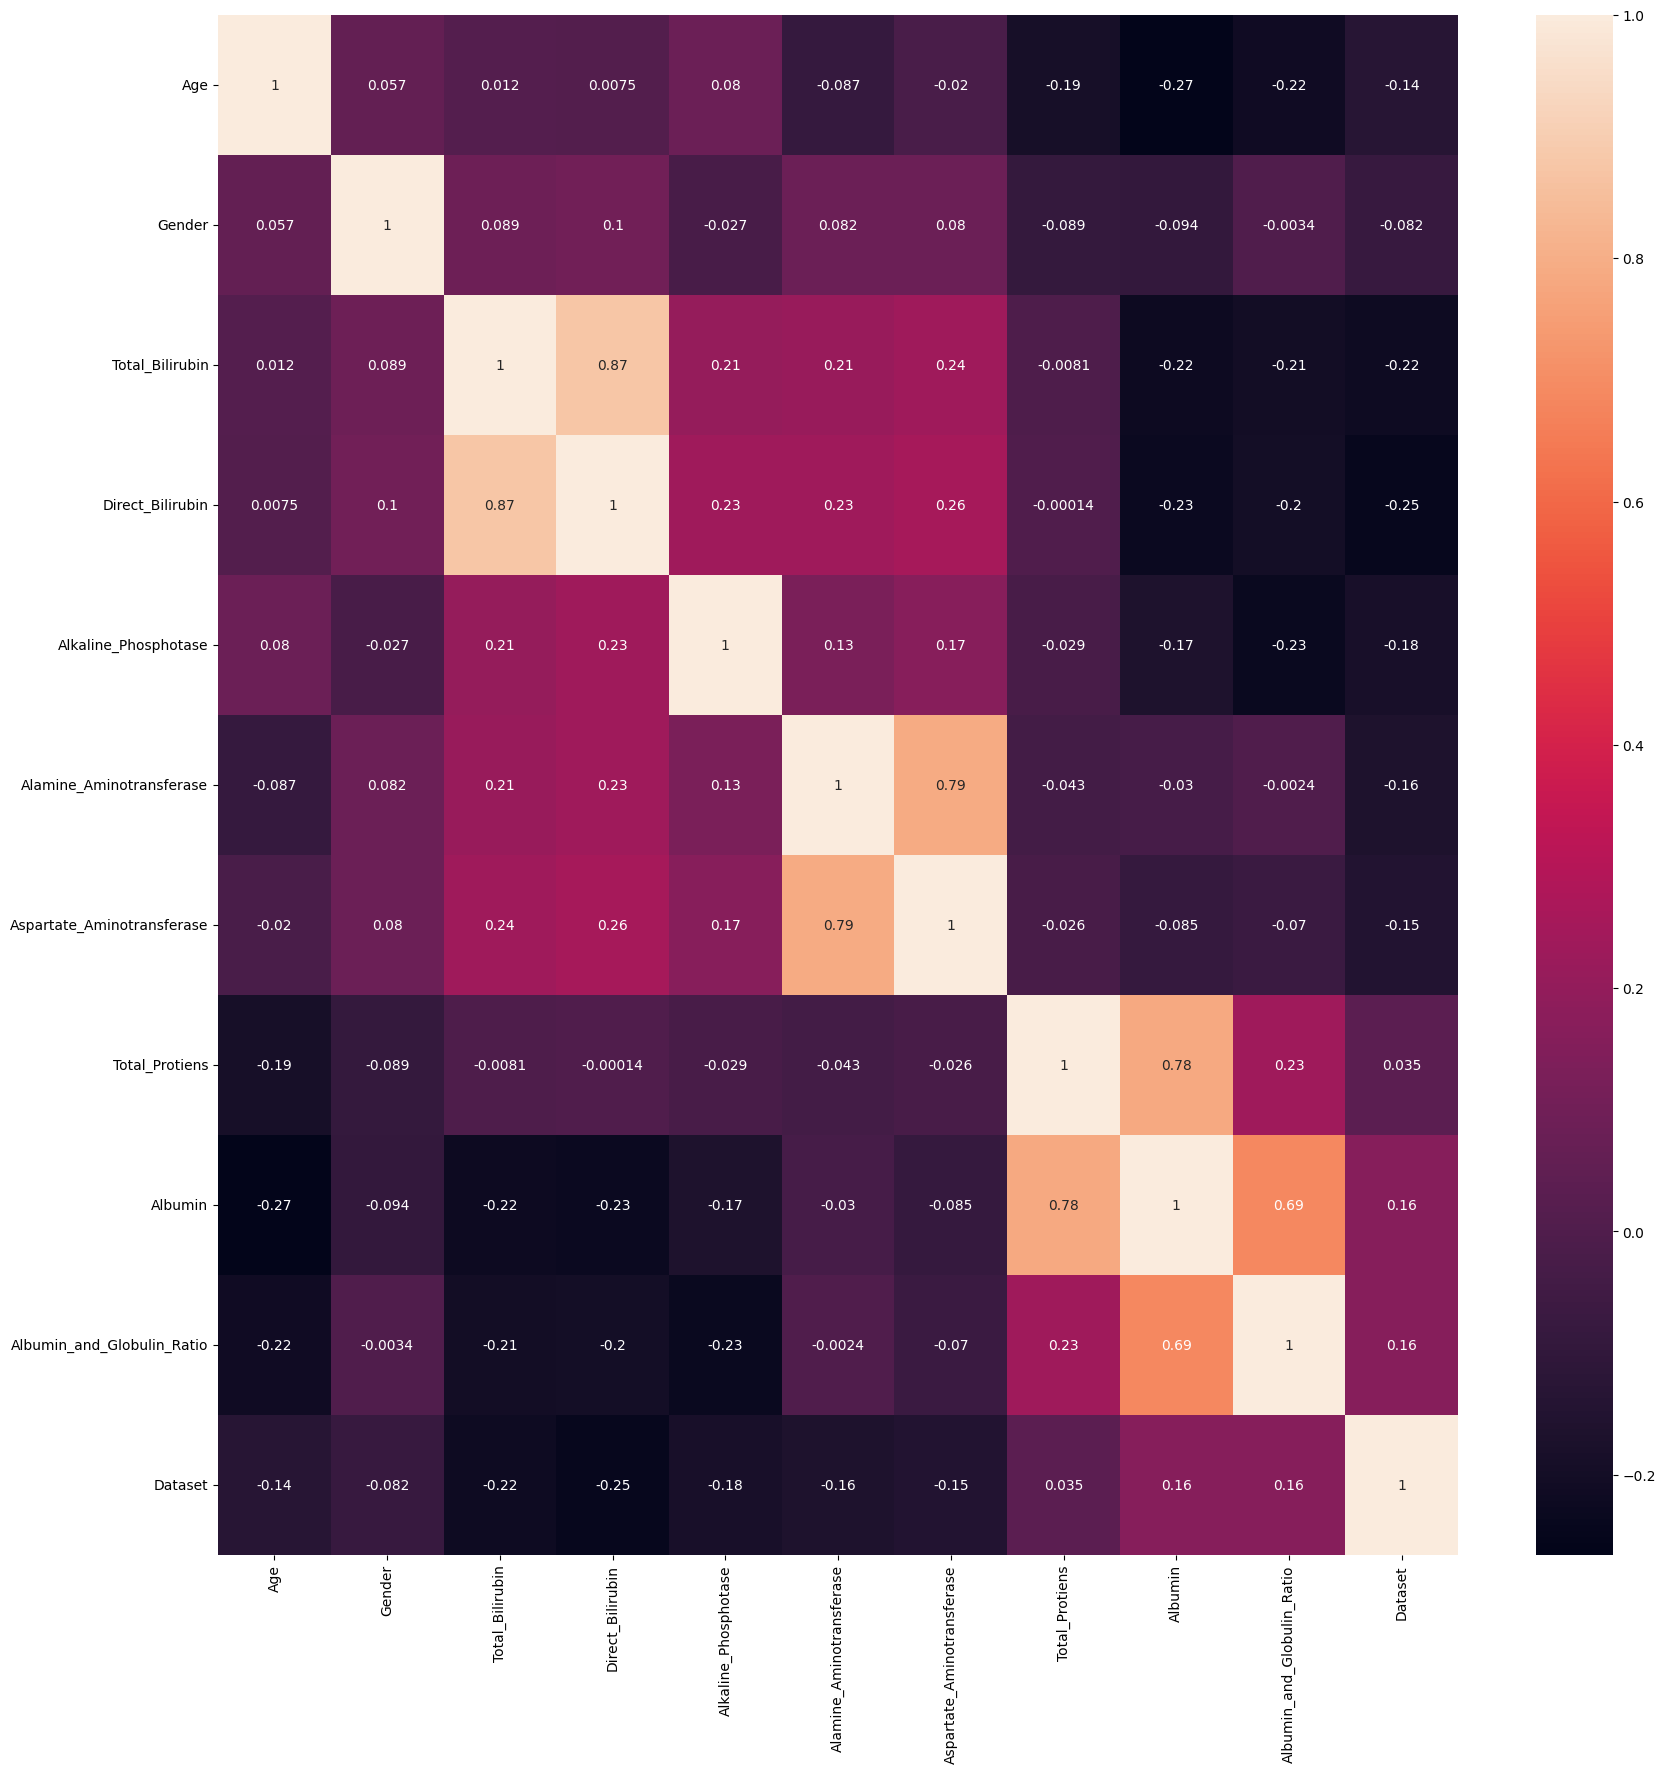

In [15]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [6]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    float64
 1   Gender                      583 non-null    float64
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    float64
 5   Alamine_Aminotransferase    583 non-null    float64
 6   Aspartate_Aminotransferase  583 non-null    float64
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    float64
dtypes: float64(11)
memory usage: 50.2 KB


In [7]:
X = df.drop(['Dataset'], axis=1)
y = df[['Dataset']]

In [8]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [9]:
print("original", y['Dataset'].value_counts())
print("oversampled",y_resampled['Dataset'].value_counts())

original 1.0    416
2.0    167
Name: Dataset, dtype: int64
oversampled 1.0    416
2.0    416
Name: Dataset, dtype: int64


In [10]:
X_resampled = X_resampled.to_numpy()
y_resampled = y_resampled.to_numpy()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [12]:
import numpy as np

def euclidean_distance(x1, x2):
    if isinstance(x1, str) or isinstance(x2, str):
        # If either x1 or x2 is a string, return a special value or handle it as needed
        return float('inf')  # For example, return positive infinity

    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance


def knn_predict(X_train, y_train, new_data_point, k=3):
    distances = [euclidean_distance(new_data_point, x) for x in X_train]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    nearest_labels = nearest_labels.astype(int)
    nearest_labels = nearest_labels.flatten()

    prediction = np.bincount(nearest_labels).argmax()
    return prediction

In [13]:
correct_predictions = 0
accuracies = []

for k in range(3,25):
    correct_predictions = 0
    for i, data_point in enumerate(X_test):
        if i > 2:
            prediction = knn_predict(X_train, y_train, data_point, k=k)
            if prediction == y_test[i]:
                correct_predictions += 1

    accuracy = correct_predictions / len(X_test) * 100
    print(f"For K = {k} Accuracy: {accuracy:.2f}%")
    accuracies.append(accuracy)

For K = 3 Accuracy: 73.20%
For K = 4 Accuracy: 72.40%
For K = 5 Accuracy: 74.00%
For K = 6 Accuracy: 71.60%
For K = 7 Accuracy: 70.80%
For K = 8 Accuracy: 68.00%
For K = 9 Accuracy: 70.00%
For K = 10 Accuracy: 68.00%
For K = 11 Accuracy: 67.20%
For K = 12 Accuracy: 67.20%
For K = 13 Accuracy: 69.60%
For K = 14 Accuracy: 66.80%
For K = 15 Accuracy: 67.20%
For K = 16 Accuracy: 68.00%
For K = 17 Accuracy: 68.40%
For K = 18 Accuracy: 68.80%
For K = 19 Accuracy: 68.00%
For K = 20 Accuracy: 67.20%
For K = 21 Accuracy: 66.80%
For K = 22 Accuracy: 68.00%
For K = 23 Accuracy: 66.80%
For K = 24 Accuracy: 68.80%


Max Accuracy for k = 5 which is 74.00%


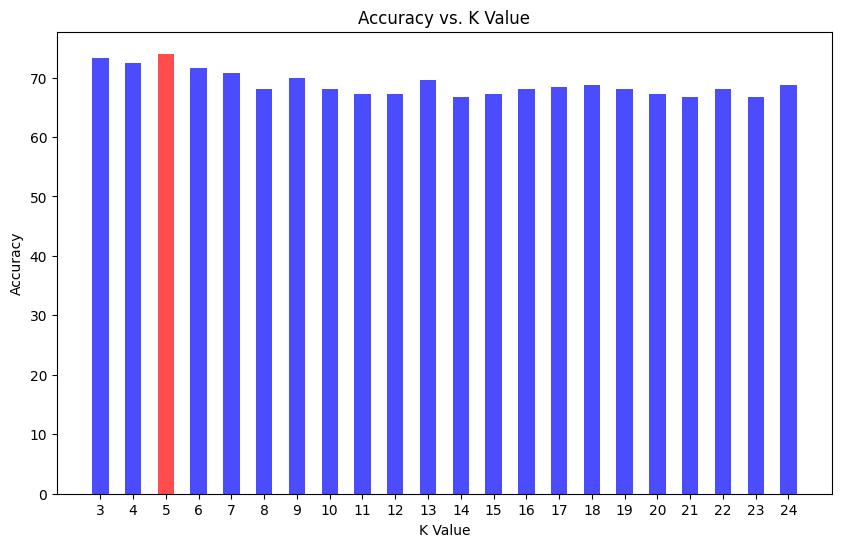

In [14]:
k_values = np.arange(3, 25)
max_accuracy_index = accuracies.index(max(accuracies))
colors = ['red' if i == max_accuracy_index else 'blue' for i in range(len(k_values))]

print(f'Max Accuracy for k = {max_accuracy_index + 3} which is {max(accuracies):.2f}%')


plt.figure(figsize=(10, 6))
plt.bar(k_values, accuracies, width=0.5, align='center', alpha=0.7, color=colors)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('Accuracy vs. K Value')
plt.show()